In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import numpy as np

warnings.filterwarnings("ignore")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

In [2]:
data_train = pd.read_csv("train.csv")
print(data_train.shape)
data_train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Feature Engineering
***https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/***

In [3]:
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if big_string.find(substring) != -1:
            return substring
    print(big_string)
    return np.nan

def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
            'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
            'Don', 'Jonkheer']

In [4]:
data_train['Title'] = data_train['Name'].map(lambda x: substrings_in_string(x, title_list))
data_train['Title'] = data_train.apply(replace_titles, axis=1)

In [5]:
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
data_train['Cabin'] = data_train['Cabin'].fillna('Unknown')
data_train['Deck'] = data_train['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))

In [6]:
data_train['FamilyMembers'] = data_train['Parch'] + data_train['SibSp']

In [7]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,FamilyMembers
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr,Unknown,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss,Unknown,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Mr,Unknown,0


# Port of Embarkment vs Survival
Although, intuitively the port of embarkment should not affect a person's survival, therefore the model should be tested with both: with and without the embarkment input

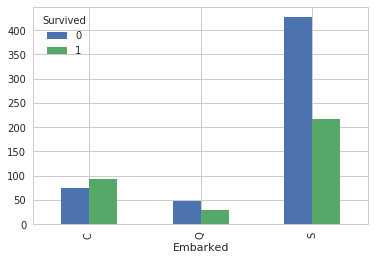

In [8]:
embs = data_train[['Embarked', 'Survived']].groupby(by=['Embarked', 'Survived']).size().unstack()
embs.plot.bar()

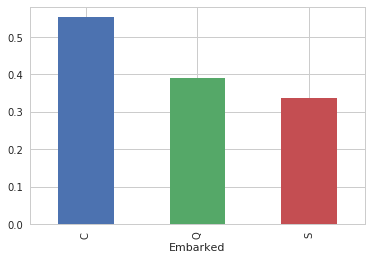

In [9]:
embs.apply(lambda x: x[1]/(x[1]+x[0]), axis=1).plot.bar()

# Deck vs Survival

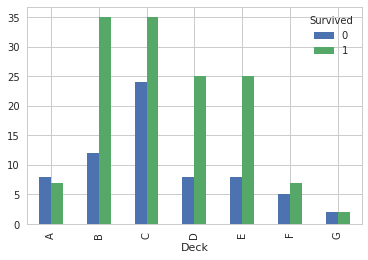

In [10]:
decks = data_train[['Deck', 'Survived']].groupby(by=['Deck', 'Survived']).size().unstack().dropna()
decks.drop(['Unknown']).plot.bar()

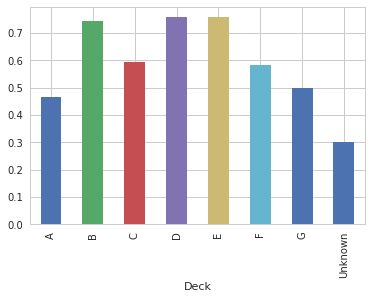

In [11]:
decks.apply(lambda x: x[1]/(x[1]+x[0]), axis=1).plot.bar()

# Gender vs Survival

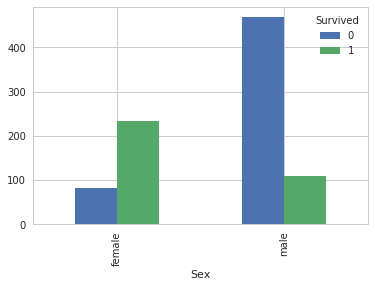

In [12]:
genders = data_train[['Sex', 'Survived']].groupby(by=['Sex', 'Survived']).size().unstack()
genders.plot.bar()

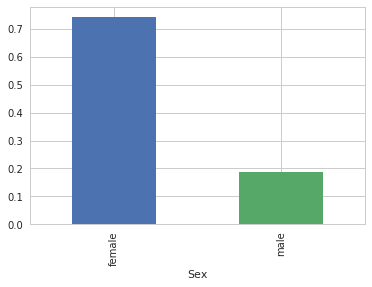

In [13]:
genders.apply(lambda x: x[1]/(x[1]+x[0]), axis=1).plot.bar()

# Titles vs Survival

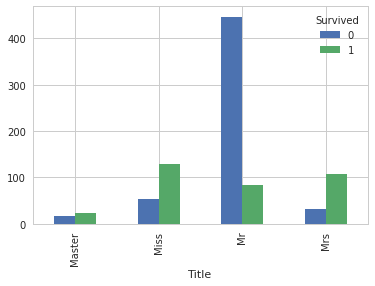

In [14]:
titles = data_train[['Title', 'Survived']].groupby(by=['Title', 'Survived']).size().unstack()
titles.plot.bar()

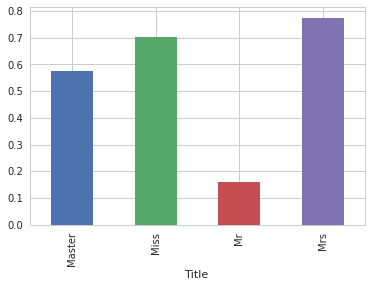

In [15]:
titles.apply(lambda x: x[1]/(x[1]+x[0]), axis=1).plot.bar()

# Socio-Economic Class vs Survival

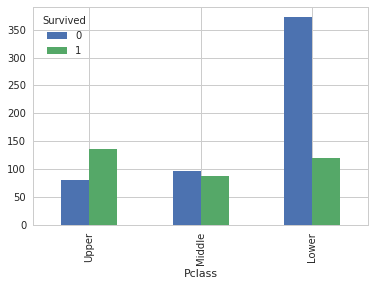

In [16]:
classes = data_train[['Pclass', 'Survived']].groupby(by=['Pclass', 'Survived']).size().unstack()
classes = classes.rename({1:"Upper", 2:"Middle", 3:"Lower"})
classes.plot.bar()

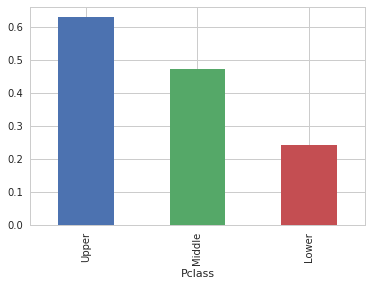

In [17]:
classes.apply(lambda x: x[1]/(x[1]+x[0]), axis=1).plot.bar()

# Number of Family Members vs Survival

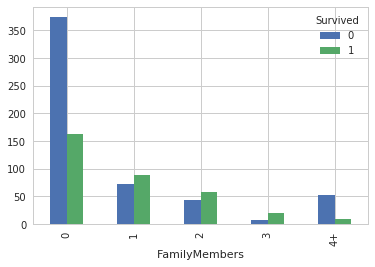

In [18]:
fms = data_train[['FamilyMembers', 'Survived']].groupby(by=['FamilyMembers', 'Survived']).size().unstack()
fms_other = fms[4:]
fms = fms[:4]
fms = fms.append(pd.Series(fms_other.sum(), name='4+'))
fms.plot.bar()

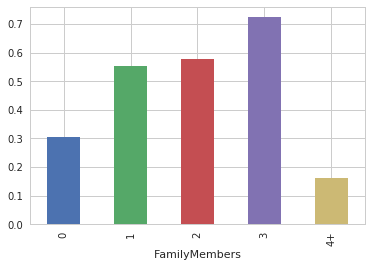

In [19]:
fms.apply(lambda x: x[1]/(x[1]+x[0]), axis=1).plot.bar()

# Age vs Survival

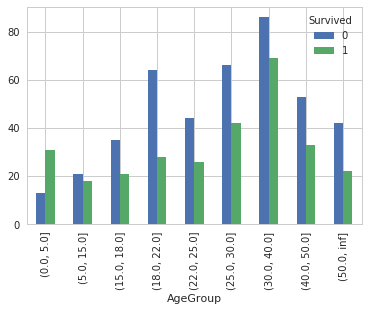

In [20]:
data_age = data_train[['Age', 'Survived']]
data_age['AgeGroup'] = pd.cut(data_age['Age'], [0,5,15,18,22,25,30,40,50,np.inf])
ages = data_age[['AgeGroup', 'Survived']].groupby(by=['AgeGroup', 'Survived']).size().unstack()
ages.plot.bar()

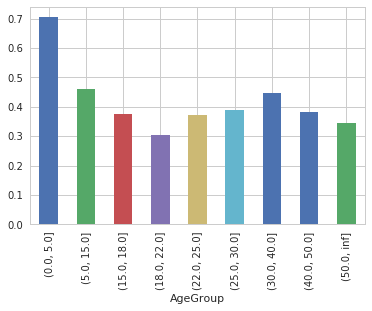

In [21]:
ages.apply(lambda x: x[1]/(x[1]+x[0]), axis=1).plot.bar()

# Fare vs Survival

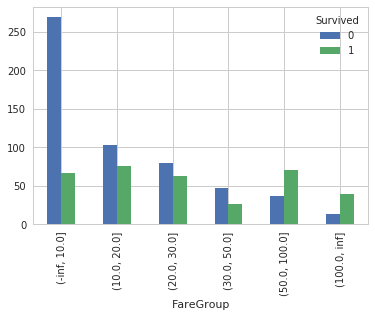

In [22]:
data_fare = data_train[['Fare', 'Survived']]
data_fare['FareGroup'] = pd.cut(data_fare['Fare'], [-np.inf,10,20,30,50,100,np.inf])
fares = data_fare[['FareGroup', 'Survived']].groupby(by=['FareGroup', 'Survived']).size().unstack()
fares.plot.bar()

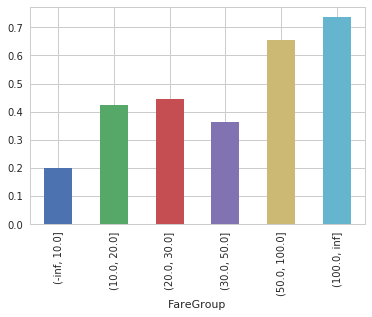

In [23]:
fares.apply(lambda x: x[1]/(x[1]+x[0]), axis=1).plot.bar()

# Null values

In [24]:
pd.DataFrame(data_train.isnull().sum()).T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,FamilyMembers
0,0,0,0,0,0,177,0,0,0,0,0,2,0,0,0


# Unique value counts

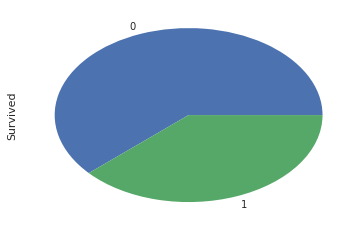

In [25]:
data_train['Survived'].value_counts().plot.pie()

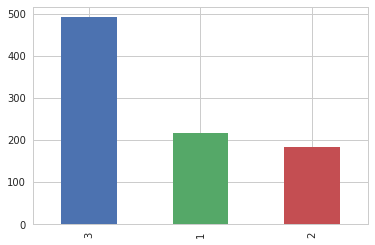

In [26]:
data_train['Pclass'].value_counts().plot.bar()

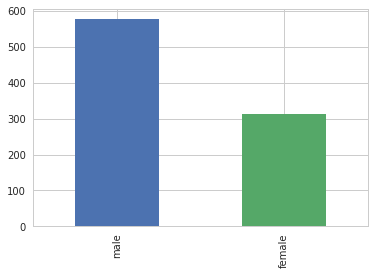

In [27]:
data_train['Sex'].value_counts().plot.bar()

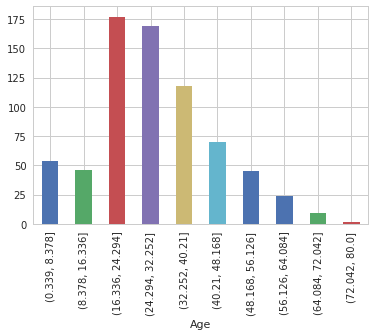

In [28]:
pd.DataFrame(pd.cut(data_train['Age'], 10, include_lowest=True)).groupby(['Age']).size().plot.bar()

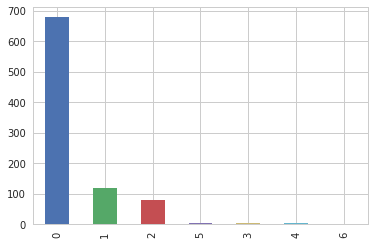

In [29]:
data_train['Parch'].value_counts().plot.bar()

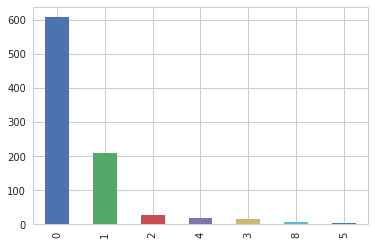

In [30]:
data_train['SibSp'].value_counts().plot.bar()

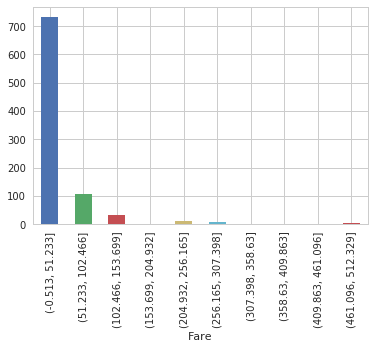

In [31]:
pd.DataFrame(pd.cut(data_train['Fare'], 10, include_lowest=True)).groupby(['Fare']).size().plot.bar()

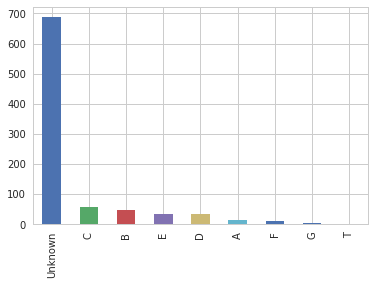

In [32]:
data_train['Deck'].value_counts().plot.bar()

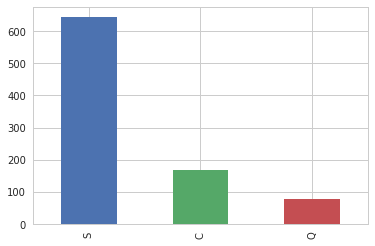

In [33]:
data_train['Embarked'].value_counts().plot.bar()

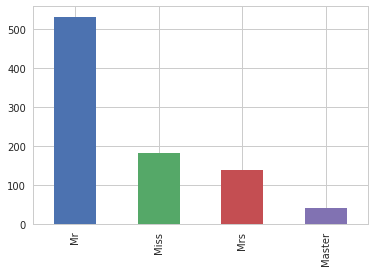

In [34]:
data_train['Title'].value_counts().plot.bar()

# Turn it into trainable data

**Input Format:**
0. Pclass: 1 (binary)
1. Pclass: 2 (binary)
2. Pclass: 3 (binary)
3. Sex: male (binary)
4. Sex: female (binary)
5. Age (float32)
6. SibSp (float32)
7. Parch (float32)
8. Fare (float32)
9. Deck: A (binary)
10. Deck: B (binary)
11. Deck: C (binary)
12. Deck: D (binary)
13. Deck: E (binary)
14. Deck: F (binary)
15. Deck: G (binary)
16. Deck: T (binary)
17. Embarked: S (binary)
18. Embarked: C (binary)
19. Embarked: Q (binary)

**Output:** Survived (binary)

In [35]:
data_train['Age'] = data_train['Age'].fillna(data_train['Age'].mean())

In [43]:
inputSet = np.zeros((data_train.shape[0], 15), dtype=np.float32)
outputSet = np.zeros(data_train.shape[0], dtype=np.float32)
idxToPassengerId = np.zeros(data_train.shape[0], dtype=np.int32)
for idx, x in enumerate(data_train.iterrows()):
    row = x[1]
    
    idxToPassengerId[idx] = row['PassengerId']
    outputSet[idx] = row['Survived']
        
    inputSet[idx][0] = row['Age']
    inputSet[idx][1] = row['SibSp']
    inputSet[idx][2] = row['Parch']
    inputSet[idx][3] = row['Fare']
            
    if row['Title'] == 'Mr': inputSet[idx][4] = 1
    elif row['Title'] == 'Mrs': inputSet[idx][5] = 1
    elif row['Title'] == 'Miss': inputSet[idx][6] = 1
    elif row['Title'] == 'Master': inputSet[idx][7] = 1
    
    if row['Deck'] == 'A': inputSet[idx][8] = 1
    elif row['Deck'] == 'B': inputSet[idx][9] = 1
    elif row['Deck'] == 'C': inputSet[idx][10] = 1
    elif row['Deck'] == 'D': inputSet[idx][11] = 1
    elif row['Deck'] == 'E': inputSet[idx][12] = 1
    elif row['Deck'] == 'F': inputSet[idx][13] = 1
    elif row['Deck'] == 'G': inputSet[idx][14] = 1
    #elif row['Deck'] in ['T', 'Unknown']: inputSet[idx][11] = 1
    
    '''
    if row['Pclass'] == 1: inputSet[idx][4] = 1
    elif row['Pclass'] == 2: inputSet[idx][5] = 1
    elif row['Pclass'] == 3: inputSet[idx][6] = 1
        
    if row['Sex'] == 'male': inputSet[idx][7] = 1
    elif row['Sex'] == 'female': inputSet[idx][8] = 1
        
    if row['Embarked'] == 'S': inputSet[idx][17] = 1
    elif row['Embarked'] == 'C': inputSet[idx][18] = 1
    elif row['Embarked'] == 'Q': inputSet[idx][19] = 1
    '''
    

In [44]:
np.savez("dataset.npz", inputSet=inputSet, outputSet=outputSet, idxToPassengerId=idxToPassengerId)

In [45]:
np.sum(inputSet, axis=0).astype(np.int32)

array([26461,   466,   340, 28693,   531,   138,   182,    40,    15,
          47,    59,    33,    33,    12,     4], dtype=int32)